In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sm
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
# plt 기본 사이즈 조정
plt.rcParams["figure.figsize"] = (16,8)

# RANSAC (RANdom SAmple Consensus) 알고리즘 설명

![image](https://user-images.githubusercontent.com/87803612/166624345-a5d0b07f-201b-4d55-8882-678d3135d559.png)

1. m개의 Sample point를 선정 후 직선을 도출하고 직선 주위에 임계값을 설정 (가설단계)
2. 임계값 내부에 있는 sample은 inlier로 판단하며 외부는 outlier로 판단 (검증단계)
3. 1,2번을 반복하며 최선의 선형 회귀 적합 

## Sample 데이터 형성

In [22]:
# 샘플 수, 이상치 수 설정
n_samples = 1000
n_outliers = 50

# 파라미터 의미
feature, target, coef = datasets.make_regression(n_samples=n_samples,  # 샘플 수
                                                 n_features=1,         # feature 수
                                                 n_informative=1,      # feature 중 실제 target과 상관성이 존재하는 변수의 개수
                                                 noise=10,             # target의 표준편차
                                                 coef=True,            # 회귀계수 출력 여부
                                                 random_state=0)

# 이상치 데이터를 feature, target에 추가
np.random.seed(2022)
feature[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
target[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

## 회귀 시행 및 예측

In [23]:
# 데이터 적합 시행 (일반 선형회귀 모형)
model = linear_model.LinearRegression()
model.fit(feature, target)

# 강경한 적합 시행 (RANSAC 알고리즘)
ransac_model = linear_model.RANSACRegressor()
ransac_model.fit(feature, target)
inlier_point = ransac_model.inlier_mask_
outlier_point = np.logical_not(inlier_point)

# 각 모델 별 예측치 추출
line_feature = np.arange(feature.min(), feature.max())[:, np.newaxis]
line_target = model.predict(line_feature)
line_target_ransac = ransac_model.predict(line_feature)

# 추출한 각 계수 비교
print(f"예측한 계수\n실제 = {coef}\n선형회귀 = {model.coef_}\nRANSAC = {ransac_model.estimator_.coef_}")

예측한 계수
실제 = 82.1903908407869
선형회귀 = [54.68211691]
RANSAC = [82.08533159]


## 시각화

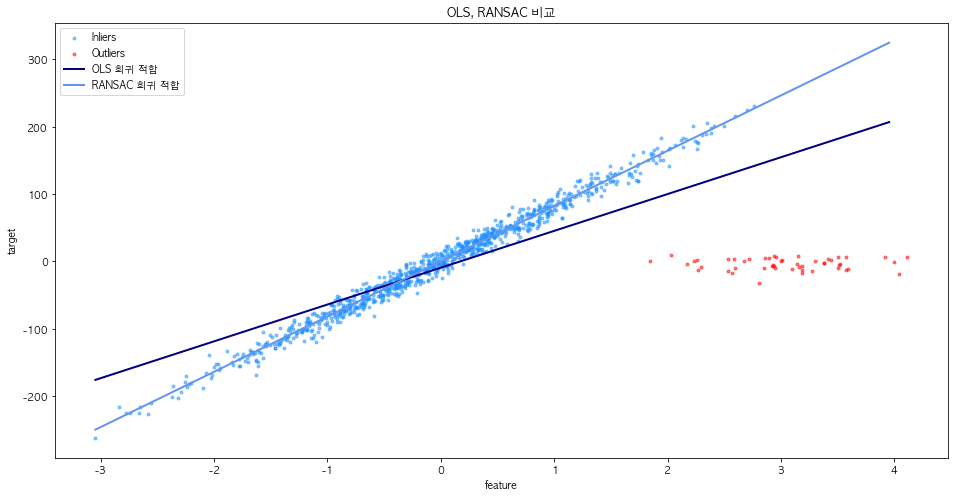

In [24]:
# 시각화
plt.scatter(feature[inlier_point], target[inlier_point], color="dodgerblue", alpha=.5, marker=".", label="Inliers")
plt.scatter(feature[outlier_point], target[outlier_point], color="red", alpha=.5,  marker=".", label="Outliers")
plt.plot(line_feature, line_target, color="navy", linewidth=2, label="OLS 회귀 적합")
plt.plot(line_feature,line_target_ransac, color="cornflowerblue", linewidth=2, label="RANSAC 회귀 적합",)
plt.legend()
plt.title('OLS, RANSAC 비교')
plt.xlabel("feature")
plt.ylabel("target")
plt.show()

# 분위수 회귀

## 데이터 불러오기 (Delhi 집 값)

In [25]:
house_data = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/house%20pricing%20delhi-%20MagicBricks.csv')
house_data

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,807.2925,2,2.0,Unfurnished,Paschim Vihar,West Delhi,"Archana Apartment, Paschim Vihar",1.0,Ready_to_move,Resale,Apartment,14722.0,8600000
1,594.0000,2,1.0,Semi-Furnished,Paschim Vihar,West Delhi,"Ashoka Apartment, Paschim Vihar Block A2",1.0,Ready_to_move,Resale,Apartment,10943.0,6500000
2,900.0000,2,2.0,Semi-Furnished,Punjabi Bagh,West Delhi,"Bhagwan Das Nagar, Punjabi Bagh",1.0,Ready_to_move,Resale,Builder_Floor,16667.0,15000000
3,464.0000,3,1.0,Unfurnished,Punjabi Bagh,West Delhi,"Bhagwan Das Nagar, Punjabi Bagh",1.0,Ready_to_move,Resale,Builder_Floor,15278.0,4200000
4,800.0000,3,2.0,Unfurnished,Paschim Vihar,West Delhi,"DDA Lig Flats, Paschim Vihar",1.0,Ready_to_move,Resale,Apartment,7875.0,6300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1459.0000,3,3.0,Semi-Furnished,Vasundhara,East Delhi,Vasundhara Enclave,1.0,Ready_to_move,Resale,Apartment,NaN,14200000
1210,1150.0000,3,3.0,Semi-Furnished,Vasundhara,East Delhi,Vasundhara Enclave,1.0,Ready_to_move,Resale,Apartment,9655.0,12000000
1211,780.0000,2,2.0,Semi-Furnished,Vasundhara,East Delhi,Vasundhara Enclave,1.0,Ready_to_move,Resale,Apartment,9655.0,7500000
1212,1460.0000,3,3.0,Unfurnished,Vasundhara,East Delhi,Vasundhara Enclave,1.0,Ready_to_move,Resale,Apartment,9655.0,12000000


In [26]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1214 non-null   float64
 1   BHK          1214 non-null   int64  
 2   Bathroom     1212 non-null   float64
 3   Furnishing   1209 non-null   object 
 4   Location     1214 non-null   object 
 5   District     1214 non-null   object 
 6   Locality     1214 non-null   object 
 7   Parking      1182 non-null   float64
 8   Status       1214 non-null   object 
 9   Transaction  1214 non-null   object 
 10  Type         1209 non-null   object 
 11  Per_Sqft     973 non-null    float64
 12  Price        1214 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 123.4+ KB


## 데이터 시각화

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_7409/1917324212.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.pairplot(data = house_data[{'Area', 'Price'}], kind='reg')


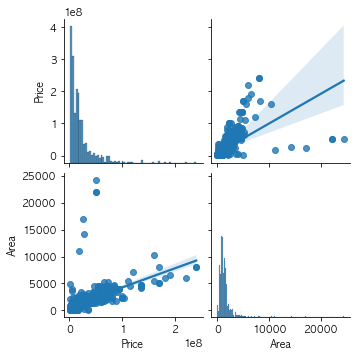

In [27]:
# 데이터 시각화 (집 크기와 그에따른 집값)
sns.pairplot(data = house_data[{'Area', 'Price'}], kind='reg')
plt.show()

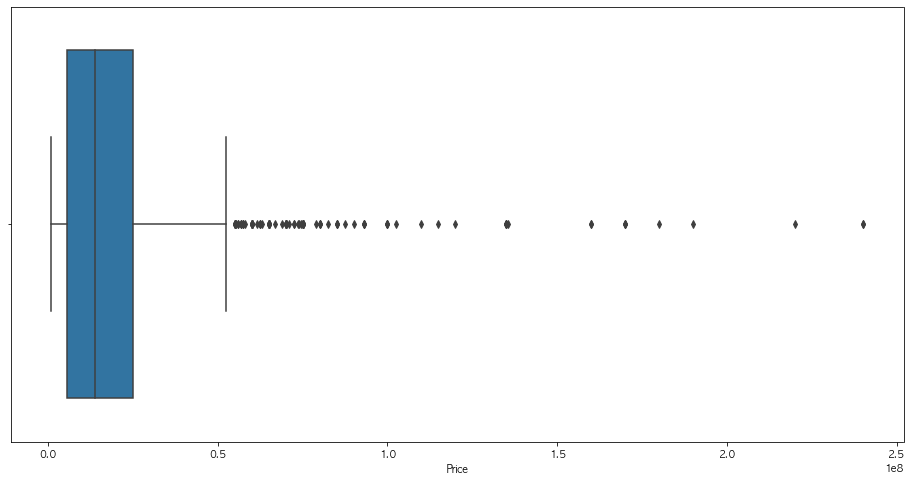

In [28]:
sns.boxplot(x ='Price', data = house_data)
plt.show()

## 단순 OLS 회귀 도출

In [29]:
# feature, target 설정
feature = house_data[['Area']]
target = house_data['Price']

# 회귀식 도출
model = LinearRegression()
model.fit(feature,target)
y_pred = model.predict(feature)

### 회귀 시각화

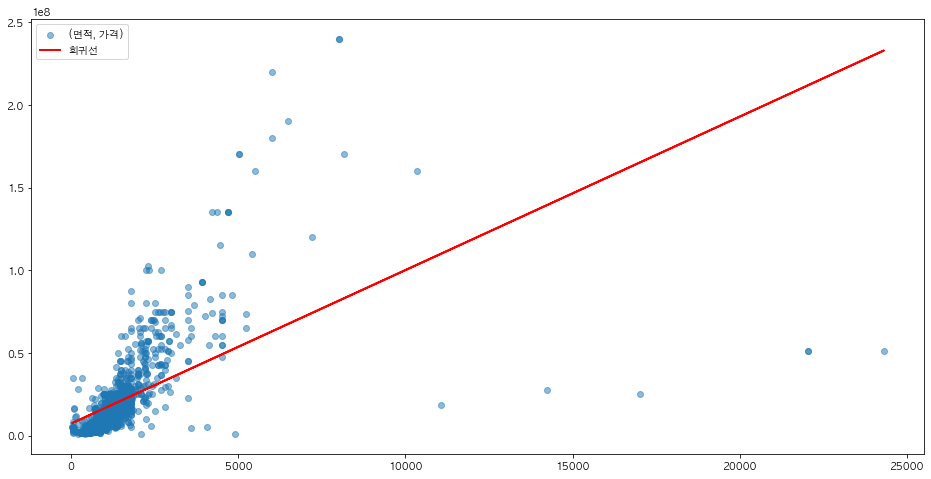

In [30]:
plt.scatter(feature['Area'], target, alpha=.5, label='(면적, 가격)')
plt.plot(feature['Area'], y_pred, color ='red', linewidth=2, label='회귀선')
plt.legend()
plt.show()

## 분위수 회귀

In [31]:
# 회귀식 적합

qnt_model = sm.quantreg('Price ~ Area', house_data)

In [32]:
# 분위수 도출

quantiles = np.arange(.05,.96,.1)
print(quantiles)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [33]:
# 분위수 회귀 시행

def fit_model(q):
  # 분위수 회귀 적합 코드
  model_result = qnt_model.fit(q=q)
  
  # 출력 값 : 분위수, 상수항, 회귀 계수, 회귀계수 신뢰구간 리스트
  return [q, model_result.params['Intercept'], model_result.params['Area']] + model_result.conf_int().loc['Area'].tolist()

# 분위수 회귀 결과 리스트 형성
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['quantile', 'intercept', 'coef', 'coef_lower_bound', 'coef_upper_bound'])
models

/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warni

,quantile,intercept,coef,coef_lower_bound,coef_upper_bound
0,0.05,8.636895e-02,2098.765429,1481.256630,2716.274228
1,0.15,-2.486486e+05,5765.765766,5338.038087,6193.493444
2,0.25,-3.378947e+06,11286.549708,10987.069072,11586.030343
3,0.35,-4.400000e+06,13764.705883,13481.334938,14048.076827
4,0.45,-5.077273e+06,15949.494950,15671.923167,16227.066732
5,0.55,-5.727273e+06,18181.818182,17920.701339,18442.935024
6,0.65,-6.325000e+06,20535.714284,20255.346653,20816.081916
7,0.75,-6.740026e+06,23220.012826,22897.638765,23542.386888
8,0.85,-7.638467e+06,27728.023963,27308.326171,28147.721756
9,0.95,-1.940083e+06,30242.510412,28936.534813,31548.486012


In [34]:
# OLS 회귀 시행
ols = sm.ols('Price ~ Area', house_data).fit()

# OLS 회귀 결과 도출
ols_ci = ols.conf_int().loc['Area'].tolist()
ols = dict(intercept = ols.params['Intercept'], coef = ols.params['Area'],
           coef_lower_bound = ols_ci[0], coef_upper_bound = ols_ci[1])
ols

{'intercept': 7326647.301415511,
 'coef': 9279.418886239282,
 'coef_lower_bound': 8534.890060632602,
 'coef_upper_bound': 10023.947711845962}

In [35]:
# x : Area 최소, 최대값을 50단위 별로 구간화 한 값
# y : 분위수 회귀에서 도출한 각 상수항과 회귀계수를 통해 pred_y 도출
x = np.arange(house_data.Area.min(), house_data.Area.max(), 50)
pred_y = lambda intercept, coef: intercept + coef * x

### 분위수 회귀 시각화

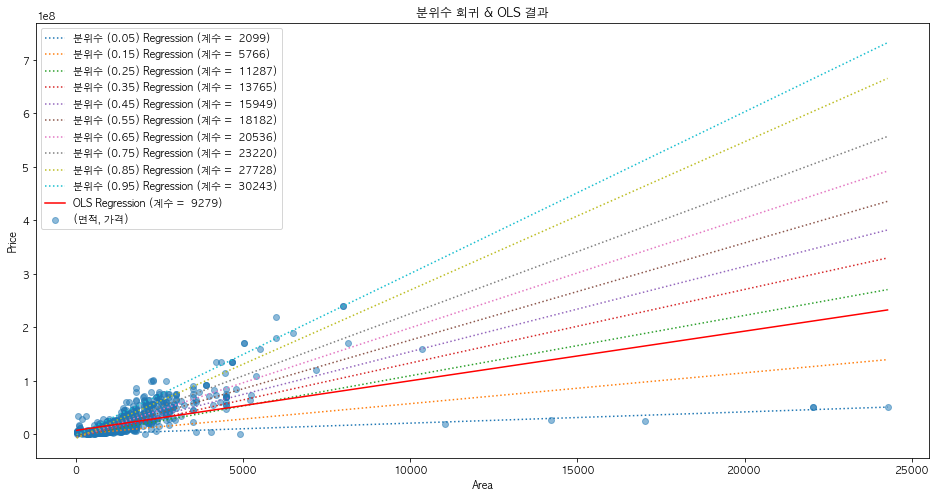

In [38]:
# 시각화
for i in range(models.shape[0]):
    plt.plot(x, pred_y(models.intercept[i], models.coef[i]), 
             linestyle='dotted', label=f'분위수 ({str(round(0.05 + i*0.1, 2))}) Regression (계수 = {models["coef"][i] : .0f})')
plt.plot(x, pred_y(ols['intercept'], ols['coef']), 
         color='red', label=f'OLS Regression (계수 = {ols["coef"] : .0f})')
plt.scatter(house_data.Area, house_data.Price, alpha=.5, label='(면적, 가격)')
plt.legend()
plt.title('분위수 회귀 & OLS 결과')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

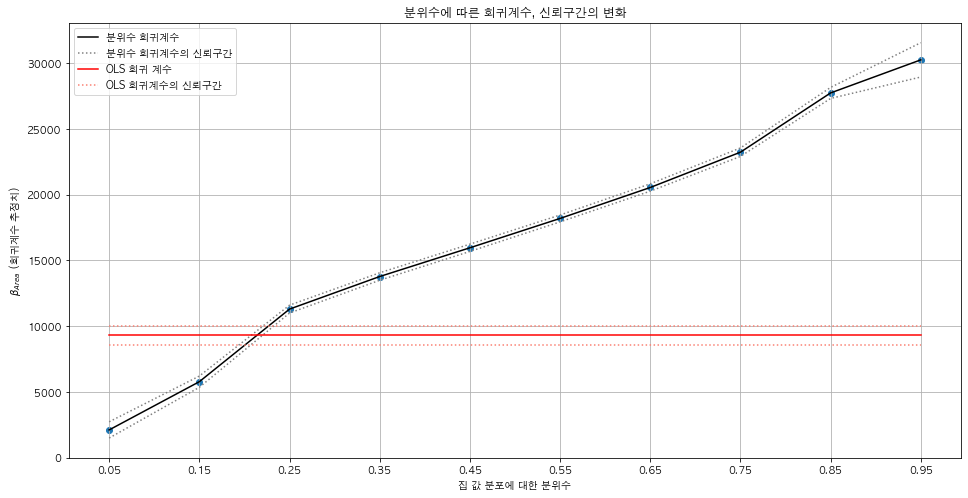

In [39]:
n = models.shape[0]
x = models['quantile']

# 분위수에 따른 회귀계수, 신뢰구간의 변화 시각화
plt.plot(x, models['coef'], color='black', label='분위수 회귀계수')
plt.scatter(x, models['coef'])
plt.plot(x, models['coef_upper_bound'], linestyle='dotted', color='grey')
plt.plot(x, models['coef_lower_bound'], linestyle='dotted', color='grey', label='분위수 회귀계수의 신뢰구간')
plt.plot(x, [ols['coef']] * n, color='red', label='OLS 회귀 계수')
plt.plot(x, [ols['coef_lower_bound']] * n, linestyle='dotted', color='salmon')
plt.plot(x, [ols['coef_upper_bound']] * n, linestyle='dotted', color='salmon', label='OLS 회귀계수의 신뢰구간')
plt.title('분위수에 따른 회귀계수, 신뢰구간의 변화')
plt.ylabel(r'$\beta_{Area}$ (회귀계수 추정치)')
plt.xlabel('집 값 분포에 대한 분위수')
plt.xticks(np.arange(.05,.96,.1))
plt.grid()
plt.legend()
plt.show()